In [1]:
%load_ext autoreload
%autoreload 2

In [54]:
from src import detect_faces, show_bboxes
from PIL import Image
from matplotlib import pyplot as plt
import cv2
from skimage import transform as trans
import numpy as np

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.77 µs


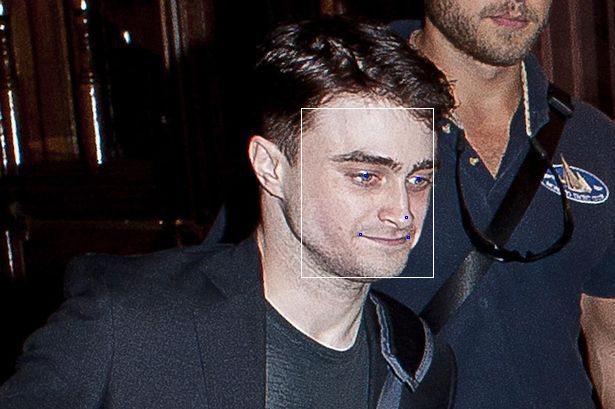

In [31]:
%time
img = Image.open('images/14680.jpg')
bounding_boxes, landmarks = detect_faces(img)
show_bboxes(img, bounding_boxes, landmarks)

In [32]:
bounding_boxes = np.round(bounding_boxes[:, 0:4]).astype('int32')[0]
print(bounding_boxes)
landmarks = landmarks[0]
print(landmarks)

[301 108 434 278]
[365.67236 418.79425 406.40854 360.92746 408.21323 175.90764 178.9214
 217.025   234.41411 237.22289]


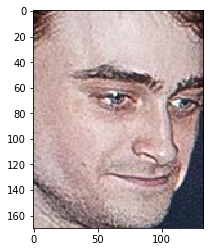

In [33]:
face_ori = np.array(img)[bounding_boxes[1]:bounding_boxes[3], bounding_boxes[0]:bounding_boxes[2],:]
plt.imshow(face_ori)

In [70]:
CROP_SIZE = (96, 112)
src = np.array([                                                                                                                                                                     
 [30.2946, 51.6963],                                                                                                                                                                
 [65.5318, 51.5014],                                                                                                                                                                
 [48.0252, 71.7366],                                                                                                                                                                
 [33.5493, 92.3655],                                                                                                                                                                
 [62.7299, 92.2041] ], dtype=np.float32 )

In [52]:
dst = np.hstack([landmarks[:5, np.newaxis], landmarks[5:, np.newaxis]])
dst

array([[365.67236, 175.90764],
       [418.79425, 178.9214 ],
       [406.40854, 217.025  ],
       [360.92746, 234.41411],
       [408.21323, 237.22289]], dtype=float32)

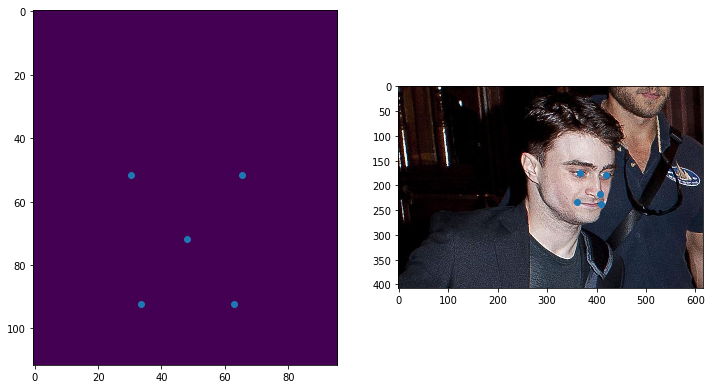

In [64]:
plt.figure(figsize=(12,8))
plt.subplot(121);plt.imshow(np.ones((112,96)))
plt.scatter(src[:,0], src[:,1])

plt.subplot(122);plt.imshow(np.array(img))
plt.scatter(dst[:,0], dst[:,1])

In [58]:
tform = trans.SimilarityTransform()
tform.estimate(dst, src)
M = tform.params[0:2,:]
M

array([[ 6.29299515e-01,  6.78419800e-02, -2.12819745e+02],
       [-6.78419800e-02,  6.29299515e-01, -3.28386226e+01]])

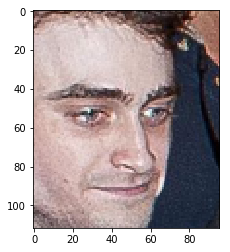

In [71]:
warped = cv2.warpAffine(np.array(img), M, CROP_SIZE, borderValue=0.0)
plt.imshow(warped)